<a href="https://colab.research.google.com/github/doheeeeekim/Undergraduate_IndustrialDS/blob/main/%EC%82%B0%EC%97%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EA%B3%BC%ED%95%99_5%EC%A3%BC%EC%B0%A8%EA%B3%BC%EC%A0%9C_%ED%92%80%EC%9D%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# #5주차 과제
>[과제] 회귀 모형을 이용하여 과제용 데이터(실제값이 제거된 데이터의 예측치 구하기
>> - 일부 변수는 본인 의사에 맞게 수정해도 됨
>> - 변수 선택은 주관적으로 시행해도 됨(불필요하다고 생각되면 제거해도 됨
>> - 예측 값은 학습한 모델에 과제용 데이터를 넣어서 출력된 값을 제출하면 됨(csv형태로)
>> - csv 형태로 저장하기 위한 방법으로는 출력 값을 pandas의 dataframe으로 변형한 다음 (출력값).to_csv('저장위치/저장파일이름.csv')를 실행하면 됨 

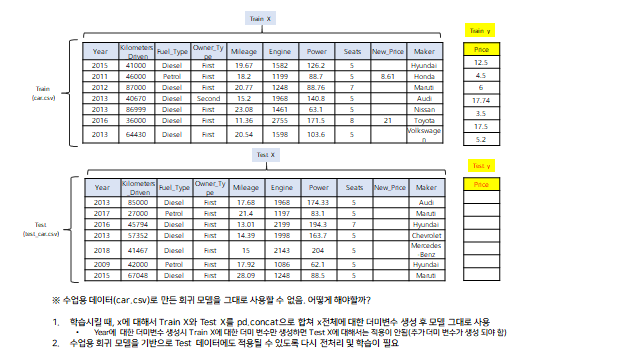

In [ ]:
#필요한 라이브러리 불러오기
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import scipy.stats as st
from google.colab import drive

In [ ]:
dt= pd.read_csv('car.csv')
dt.head()



,Year,Kilometers_Driven,Fuel_Type,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Maker,Price
0,2015,41000,Diesel,First,19.67,1582,126.20,5.0,NaN,Hyundai,12.50
1,2011,46000,Petrol,First,18.20,1199,88.70,5.0,8.61,Honda,4.50
2,2012,87000,Diesel,First,20.77,1248,88.76,7.0,NaN,Maruti,6.00
3,2013,40670,Diesel,Second,15.20,1968,140.80,5.0,NaN,Audi,17.74
4,2013,86999,Diesel,First,23.08,1461,63.10,5.0,NaN,Nissan,3.50


In [ ]:
predict_dt=pd.read_csv('test_car.csv')
predict_dt.head()

,Year,Kilometers_Driven,Fuel_Type,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Maker
0,2013,85000,Diesel,First,17.68,1968,174.33,5,NaN,Audi
1,2017,27000,Petrol,First,21.40,1197,83.10,5,NaN,Maruti
2,2016,45794,Diesel,First,13.01,2199,194.30,7,NaN,Hyundai
3,2013,57352,Diesel,First,14.39,1998,163.70,5,NaN,Chevrolet
4,2018,41467,Diesel,First,15.00,2143,204.00,5,NaN,Mercedes-Benz


In [ ]:
dt0=dt.iloc[:,:10]
dt0.info()
dt0['Year']=dt0['Year'].astype('object')
dt0['Seats']=dt0['Seats'].astype('object')
test1=pd.get_dummies(dt0,prefix_sep='_',drop_first=True)
len(test1.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5558 entries, 0 to 5557
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               5558 non-null   int64  
 1   Kilometers_Driven  5558 non-null   int64  
 2   Fuel_Type          5558 non-null   object 
 3   Owner_Type         5558 non-null   object 
 4   Mileage            5558 non-null   float64
 5   Engine             5558 non-null   int64  
 6   Power              5558 non-null   float64
 7   Seats              5556 non-null   float64
 8   New_Price          773 non-null    object 
 9   Maker              5558 non-null   object 
dtypes: float64(3), int64(3), object(4)
memory usage: 434.3+ KB


582

In [ ]:
predict_dt['Year']=predict_dt['Year'].astype('object')
predict_dt['Seats']=predict_dt['Seats'].astype('object')
test2=pd.get_dummies(predict_dt,prefix_sep='_',drop_first=True)
len(test2.columns)

49

In [ ]:
#결측치 확인
for col_value in dt.columns:
  detect_null = sum(dt[col_value].isnull())
  print("{}에 포함된 결측값은 {}개 입니다".format(col_value, detect_null))

Year에 포함된 결측값은 0개 입니다
Kilometers_Driven에 포함된 결측값은 0개 입니다
Fuel_Type에 포함된 결측값은 0개 입니다
Owner_Type에 포함된 결측값은 0개 입니다
Mileage에 포함된 결측값은 0개 입니다
Engine에 포함된 결측값은 0개 입니다
Power에 포함된 결측값은 0개 입니다
Seats에 포함된 결측값은 0개 입니다
New_Price에 포함된 결측값은 4783개 입니다
Maker에 포함된 결측값은 0개 입니다
Price에 포함된 결측값은 0개 입니다


In [ ]:
dt=dt.loc[dt['Seats'].notnull(),:]
dt

,Year,Kilometers_Driven,Fuel_Type,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Maker,Price
0,2015,41000,Diesel,First,19.67,1582,126.20,5.0,NaN,Hyundai,12.50
1,2011,46000,Petrol,First,18.20,1199,88.70,5.0,8.61,Honda,4.50
2,2012,87000,Diesel,First,20.77,1248,88.76,7.0,NaN,Maruti,6.00
3,2013,40670,Diesel,Second,15.20,1968,140.80,5.0,NaN,Audi,17.74
4,2013,86999,Diesel,First,23.08,1461,63.10,5.0,NaN,Nissan,3.50
...,...,...,...,...,...,...,...,...,...,...,...
5553,2014,27365,Diesel,First,28.40,1248,74.00,5.0,7.88,Maruti,4.75
5554,2015,100000,Diesel,First,24.40,1120,71.00,5.0,NaN,Hyundai,4.00
5555,2012,55000,Diesel,Second,14.00,2498,112.00,8.0,NaN,Mahindra,2.90
5556,2013,46000,Petrol,First,18.90,998,67.10,5.0,NaN,Maruti,2.65


In [ ]:
#결측치 확인
for col_value in predict_dt.columns:
  detect_null = sum(predict_dt[col_value].isnull())
  print("{}에 포함된 결측값은 {}개 입니다".format(col_value, detect_null))

Year에 포함된 결측값은 0개 입니다
Kilometers_Driven에 포함된 결측값은 0개 입니다
Fuel_Type에 포함된 결측값은 0개 입니다
Owner_Type에 포함된 결측값은 0개 입니다
Mileage에 포함된 결측값은 0개 입니다
Engine에 포함된 결측값은 0개 입니다
Power에 포함된 결측값은 0개 입니다
Seats에 포함된 결측값은 0개 입니다
New_Price에 포함된 결측값은 209개 입니다
Maker에 포함된 결측값은 0개 입니다


In [ ]:
y=dt['Price']

In [ ]:
x= pd.concat([dt.iloc[:,:10],predict_dt])
x.head()

,Year,Kilometers_Driven,Fuel_Type,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Maker
0,2015,41000,Diesel,First,19.67,1582,126.20,5.0,NaN,Hyundai
1,2011,46000,Petrol,First,18.20,1199,88.70,5.0,8.61,Honda
2,2012,87000,Diesel,First,20.77,1248,88.76,7.0,NaN,Maruti
3,2013,40670,Diesel,Second,15.20,1968,140.80,5.0,NaN,Audi
4,2013,86999,Diesel,First,23.08,1461,63.10,5.0,NaN,Nissan


In [ ]:
print(len(dt))
print(len(predict_dt))

5556
250


In [ ]:
col=list(x.columns)
col.remove('New_Price')
x=x.loc[:,col]

In [ ]:
x['Year']=x['Year'].astype('object')
x['Seats']=x['Seats'].astype('object')

In [ ]:
x=pd.get_dummies(x,prefix_sep='_',drop_first=True)
x.head()

,Kilometers_Driven,Mileage,Engine,Power,Year_1999,Year_2000,Year_2001,Year_2002,Year_2003,Year_2004,...,Maker_Mini,Maker_Mitsubishi,Maker_Nissan,Maker_Porsche,Maker_Renault,Maker_Skoda,Maker_Tata,Maker_Toyota,Maker_Volkswagen,Maker_Volvo
0,41000,19.67,1582,126.20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,46000,18.20,1199,88.70,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,87000,20.77,1248,88.76,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,40670,15.20,1968,140.80,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,86999,23.08,1461,63.10,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
trainx=x.iloc[:len(y),:].to_numpy()
testx=x.iloc[len(y):,:].to_numpy()
#가격이 0이상의 값(양수)로 만들어주기 위해 로그치환해주기
trainy=np.log(y).to_numpy()

In [ ]:
import sklearn.preprocessing
scaler=sklearn.preprocessing.MinMaxScaler()
trainx=scaler.fit_transform(trainx)
testx=scaler.fit_transform(testx)
print(trainx)

[[0.05269421 0.69260563 0.17826572 ... 0.         0.         0.        ]
 [0.05914724 0.64084507 0.10699665 ... 0.         0.         0.        ]
 [0.11206215 0.73133803 0.11611463 ... 0.         0.         0.        ]
 ...
 [0.07076271 0.49295775 0.34871604 ... 0.         0.         0.        ]
 [0.05914724 0.66549296 0.06959434 ... 0.         0.         0.        ]
 [0.06043785 0.89577465 0.05805731 ... 0.         0.         0.        ]]


In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression(fit_intercept=False, normalize=True, copy_X=True)
print(model)

LinearRegression(fit_intercept=False, normalize=True)


In [ ]:
model.fit(trainx,trainy)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(fit_intercept=False, normalize=True)

In [ ]:
print('R-square: {}'.format(model.score(trainx, trainy)))

R-square: 0.9145263269639354


In [ ]:
from sklearn.metrics import mean_squared_error
train_predict = model.predict(trainx)
compare = pd.concat([pd.DataFrame(abs(train_predict)), pd.DataFrame(trainy)],axis=1)
print(compare)
mean_squared_error(train_predict, trainy)

             0         0
0     2.139913  2.525729
1     1.096729  1.504077
2     1.541788  1.791759
3     2.700406  2.875822
4     1.338642  1.252763
...        ...       ...
5551  1.485376  1.558145
5552  1.632049  1.386294
5553  1.755119  1.064711
5554  1.190855  0.974560
5555  0.650684  0.916291

[5556 rows x 2 columns]


0.06361236563086813

In [ ]:
predict=model.predict(testx)
np.exp(predict)

array([ 15.62646519,   5.63893435,  18.19473607,   6.1549443 ,
        42.29948526,   1.76274961,   4.8662249 ,   9.33568729,
         6.49461777,  22.5655561 ,   6.66070991,   4.80880479,
         4.1294344 ,  17.74230363,  20.74087983,   5.47303552,
         2.82225144,  44.21014484,  14.16727777,   6.12153528,
         1.97263369,   3.21294515,   4.8291315 ,   8.46417641,
        10.51441076,   3.79861931,   9.10857642,   6.09324726,
         9.6382997 ,   3.21002276,   1.77058587,  39.52078865,
        19.48734093,   4.49691752,   5.54379762,   4.78693646,
         2.45372362,  95.79418756,  32.40372522,   2.19880586,
         2.20165911,   4.14007087,   3.79233416,  12.074571  ,
         3.39801194,   4.57536833,   6.29253587,  33.95271042,
         2.54200386,   2.26271034,   7.53295566,   4.19787315,
         4.70484574,   2.92899347,   4.11913886,   7.8347776 ,
         6.10994315,   6.52081657,   1.76373623,  33.73541082,
         4.16918479,   9.47234409,   4.31805656,   5.33

In [ ]:
predict=pd.DataFrame(predict)
predict.to_csv('test_predict.csv')
